# IMDS Workshop 5 - Review exercises for reading week
### *By Jeffrey Giansiracusa - Michaelmas*

This worksheet contains some optional additional exercises covering material from the first 4 weeks of IMDS.  Once you've finished the previous 4 worksheets, if you want some further practice on any of these topics then scroll down to the relevant section here.


# 0. Initialization code to run before you start your work

Click on the cell below and then type Shift-Return to execute it.

In [ ]:
import numpy as np
import math
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import sympy as sp
from sympy import latex
from IPython.display import display, Math


from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.palettes import Magma, Inferno, Plasma, Viridis, Cividis 
output_notebook()


def g(X,Y):
    return 10*np.exp(-(X-2)**2/6 -(Y-2)**2/50) + 10*np.sin((-(X+2)**2/20 -(Y+5)**2/70)) 


# Input is a list of 2d vectors to be plotted.
def Plot2dVectors(list_of_endpoints):   
    p = figure(width=600, height=600, title="Vectors!")
    for vect in list_of_endpoints:
        xcoords = [0,vect[0]]
        ycoords = [0,vect[1]]
        p.line(xcoords, ycoords, line_width=2)
        p.circle([vect[0]], [vect[1]], color='red', size=6)
    show(p)

# Input is a list of 3d vectors
# This will draw the vectors with shadows and vertical rise indicators
def Plot3dVectors(list):       
    ax = plt.axes(projection = '3d')
    for vect in list:
        ax.plot([0,vect[0]], [0,vect[1]], [0,vect[2]],color='blue')
        ax.plot([0,vect[0]], [0,vect[1]], [0,0],color='grey')
        ax.plot([vect[0],vect[0]], [vect[1],vect[1]], [0,vect[2]], '--', color='grey')
    ax.plot([0,0], [-10,10], 'g--')
    ax.plot([-10,10], [0, 0], 'g--')
    plt.draw()
    plt.show()    

def Plot3dDots(list):       
    limit=20
    plt.figure(figsize=(10, 8), dpi=80)
    ax = plt.axes(projection = '3d')
    ax.set_xlim(-limit,limit)
    ax.set_ylim(-limit,limit)
    ax.set_zlim(-limit,limit)

    # Draw the shadow
    ax.scatter3D([item[0] for item in list], [item[1] for item in list], [-20 for item in list], color='grey')

    # Draw the coordinate axes
    ax.plot([0,0], [-limit,limit], [0,0], 'g--')
    ax.plot([-limit,limit], [0, 0], [0,0], 'g--')
    ax.plot([0,0], [0, 0], [-limit,limit], 'g--')

    # Now draw the points
    ax.scatter3D([item[0] for item in list], [item[1] for item in list], [item[2] for item in list], c=[item[2] for item in list])

    plt.draw()
    plt.show()   

### If you have Holoviews and Plotly installed and working,
then you can get an interactive 3d view using the fancy version defined below.

In [ ]:

import holoviews as hv
from holoviews import dim, opts
hv.extension('plotly')

def FancyPlot3dVectors(list):
    xcoords=[]
    ycoords=[]
    zcoords=[]
    colorlist=[]
    for vect in list:
        steps = np.mgrid[0:100]*0.01
        x = steps*vect[0]
        y = steps*vect[1]
        z = steps*vect[2]
        xcoords += [val for val in x]
        ycoords += [val for val in y]
        zcoords += [val for val in z]
        colorlist += [(1-val) for val in steps]
    xcoords = np.array(xcoords)
    ycoords = np.array(ycoords)
    zcoords = np.array(zcoords)
    return hv.Scatter3D((xcoords, ycoords, zcoords)).opts(cmap='fire', color=colorlist, size=5, width=800, height=800)


-----------------------------------------------------


### Visualisations

In the initialisation block at the top, there are some easy-to-use plotting functions defined for you.

**Plot2dVectors(...)** takes a list (however long you want) of 2d (x,y) vectors as input (the vectors can be np.arrays or simply Python lists of numbes) and draws them in the plane.  For example, you could draw the vectors (1,1), (1,2), and (1,3) using

Plot2dVectors([[1,1], [1,2], [1,3]])

**Plot3dvectors(...)** does the same in 3d.  e.g.,

Plot3dVectors([[1,1,1], [1,2,2], [1,3,3]])

Making visual sense of 3d plots is sometimes difficult, and it can be useful to have a plot that you can rotate around and look at from different directions.  if **Plotly** is working for you, you can use the 'fancy' version instead

**FancyPlot3dVectors(...)**



In [ ]:
# An example of 2d plotting

vect1 = [2, 5]
vect2 = [5,-4]
vect3 = [-4,0]

list_of_vectors = [vect1, vect2, vect3]
Plot2dVectors(list_of_vectors)



In [ ]:
# An example of 3d plotting.
# The input is a list containing some number of 3d vectors [x,y,z] (as Python lists or np.array objects)

Plot3dVectors( [[7,7,3], [5,-5,2], [-8,1,5], [-5, -10, 5]] )

In [ ]:
# Same example, but now using the 'fancy' version

FancyPlot3dVectors( [[7,7,3], [5,-5,2], [-8,1,5], [-5, -10, 5]] )


---
#  1. Some general Python / NumPy / SymPy review

For this module, you just need a very limited selection of skills in Python.  You will pick up much more over the year.

Here is a list of key things that you should be comfortable with for this module:
* Python lists: [a, b, c, ...] - creating them and reading elements from them.
* Basic mathematical functions in Python using NumPy or the math module.
* Vectors with NumPy using np.array(...)
* Performing mathematical operations on NumPy vectors, including vector addition, scalar multiplicaion, and dot product.
* Creating mathematical expressions with SymPy

That's it for now!

Knowing how to make plots with packages such as Matplotlib, Bokeh, or Plotly, is a fantastic skill for your future.  But we're keeping that as purely optional for this module, and so all you need to be able to do for now is use the simple plotting functions provided above.

--- 
# 2. Symbolic differentiation and integration

## Differentiation
A straight line has a slope.  The equation in general looks like: $y=mx + b$.  The number $b$ is the $y$-intercept; i.e., height of the line when it crosses the $y$-axis.  The number $m$ is the slope.  If you change $x$ by some amount, say $h$ (going from $x$ to $x+h$ then the height will change by $mh$. 

A general function $f(x)$ is rarely a straight line, but (as long as the function isn't some crazy monster function dreamed up by mathematicians), if we look with a microscope at a point $(x,f(x))$ on the graph, it will look more and more like a straight line as we zoom further and further in.  

**You can try this with the Bokeh plot below.**  How much do you have to zoom in before the graph looks indistinguishable from a line?

In [ ]:
# Define f(x)
def f(x):
#    return (6-x)**2 * (2+np.cos((10-x)**2/2))
    return (x-5)**3 * np.exp(-(x-5)**2/4)

# Now draw the graph of f(x)
p = figure(width=600, height=600, title='f(x)')
p.line(np.linspace(0,10,1000), f(np.array(np.linspace(0,10,1000))), line_width=2)
show(p)


### Here is a quick summary of some key facts about differentiation that you might find useful.

Table of some common derivatives:

* $\frac{d}{dx} (\text{constant})=0$                      
* $\frac{d}{dx}x = 1$                        
* $\frac{d}{dx}(x^n) =nx^{n-1}$ (this works when $n$ is any real number)
* $\frac{d}{dx}\sin (x)=\cos (x)$                
* $\frac{d}{dx}\cos (x)=-\sin (x)$               
* $\frac{d}{dx} e^x = e^x$                      
* for $a>0$, $\frac{d}{dx} a^x = a^x \ln(a)$               
* $\frac{d}{dx}\ln (x)=\frac{1}{x}$  (as long as $x>0$)

<!---
 $f(x)=\tan (x)$       --- > $f^\prime (x)=\frac{1}{\cos^2 (x)}$    
 $f(x)=\cot (x)$       --- > $f^\prime (x)=-\frac{1}{\sin^2 (x)}$   --->


The three rules for differentiation are:
* Linearity:  $\frac{d}{dx} (Af(x) + Bg(x)) = Af^\prime(x) + Bg(x)^\prime$
* Product rule: $(fg)^\prime = f^\prime g + f g^\prime$
* Chain rule: $f(g(x))^\prime = f^\prime(g(x))g^\prime(x)$

Using the three rules and the table above, you can differentiate any function made out of the functions above.

### Exercise 2.1

If you want to practice symbolically differentiating functions, here are some to try.

1. $x^3 \log(x)$
2. $\log(x)^{-3}$
3. $f(x) = \sin(\cos(e^{x^2}))$
4. $\frac{2 + x^2}{5 - x^3}$


## Integration, antiderivatives, and the Fundamental Theorem of Calculus

### Antiderivatives

An **antiderivative** of a function $f(x)$ is a function $F(x)$  such that $F'(x) = f(x)$.  

A function is called *elementary* if it has a formula made out of the basic ingredients appearing in the table above.  The rules of differentiation tell us that derivatives of elementary functions are always elementary functions.  But the same is unfortunately not true for antiderivatives.  There are lots of elementary functions that don't have an elementary function formula for their antiderivative.


### Integrals
The symbol $\int_a^b f(x)dx$ is the integral of $f$ from $a$ to $b$.  This means the total area between the graph of $f$ and the $x$-axis, but note that we count regions below the axis as negative areas.


The Fundamental Theorem of Calculus (FTC) is an important result that tells us that integration is basically the opposite of differentiation.  There are two versions of the FTC.  

### Fundamental Theorem of Calculus - version 1
To calculate $\int_a^b f(x)dx$,  we first find an *antiderivative* of $f$, i.e., a function $F(x)$  such that $F'(x) = f(x)$.  Then $$\int_a^bf(x)dx = F(b) - F(a).$$

### Example
Suppose we want to know $\int_2^{10} \frac{1}{x}dx$.  Looking at the table above, observe that $\frac{d}{dx} \log(x) = 1/x$, so $F(x) = \log(x)$ is our antiderivative.  Then the FTC says that the integral is equal to $\log(10) - \log(2)$.

Note that we have to be careful with where formulas are defined and not defined. The function $\log(x)$ is not defined for $x\leq 0$, it's not an antiderivative of $1/x$ when $x$ is negative.  Hence we can't immediately use the FTC.

### Fundamental Theorem of Calculus - version 2
Think of the integral $\int_a^b f(x)dx$ as a function of $a$ and $b$.  We can look at how this function changes as we change $b$, and in particular, we can differentiate with respect to $b$.  The FTC says: $$\frac{\partial}{\partial b}\left(\int_a^b f(x)dx \right) = f(b).$$

This tells us that if we move $b$ by a tiny bit to $b+h$, the value of $\int_a^b f(x)dx$ should change by approximately $h\cdot f(x)$.

### Evaluating integrals

While symbolic differentiation is a striaghtforward (but sometimes tedious) process, symbolic integration is unfortunately not always straightforward.  There are endless tricks for different types of integrals.  People have written entire books on the subject.  Wolfram Alpha and SymPy can do quite a lot. 

**For this module, you don't have to learn how do to symbolic integration.**   However, if you are ambitious or curious, here is a peek.  The three rules of differentiation given above have analogous rules for integration.

1. Integration is linear:  $\int_a^b(Af(x) + Bg(x))dx = A\int_a^b f(x)dx + B\int_a^b g(x)dx$.   This is analogous to differentiation being linear.
2. Integration by parts - this is the analogue of the product formula for differentiation.
3. Change of variables (also called integration by substitution) - this the analogue of the chain rule.


### Exercise 2.2
Working with pen and paper, use the table of derivatives above and the 3 rules for the following questions. 
1. Find an antiderivative of $5x^2 + 2x^7$, and then use the FTC to evaluate $\int_0^1 (5x^2 + 2x^7)dx$.
2. Find an antiderivative of $\cos(3x)$, and then use the FTC to evaluate $\int_0^{4\pi}\cos(3x)dx$.

3. Find an antiderivative of $\frac{1}{x-2}$ (for $x>2$), and then use the FTC to evaluate $\int_3^4 \frac{1}{x-2}dx$.

<IPython.core.display.Math object>

23/12


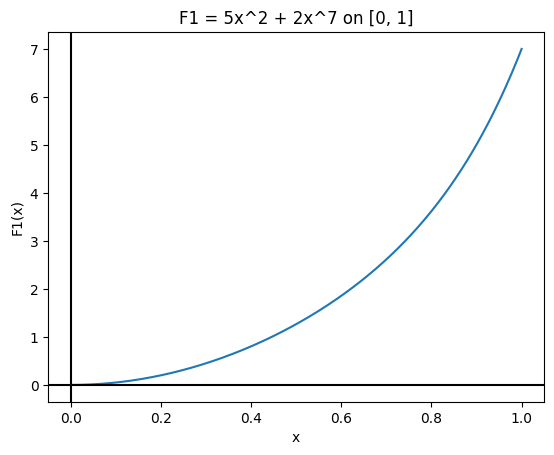

<IPython.core.display.Math object>

0


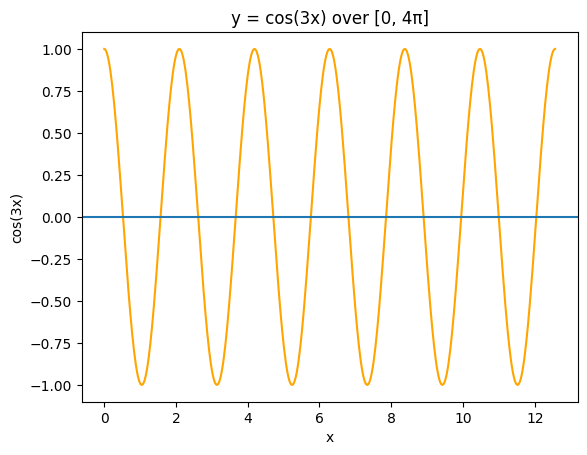

In [51]:
x = sp.Symbol("x")
F1 = 5*x**2 + 2*x**7
F2 = sp.cos(3*x)
F3 = 1/(x - 2)

#------------------------------------------------------1.-----------------------------------------------------------------------------
display(Math(latex(result_f1)))

F1 = 5*x**2 + 2*x**7
result_F1 = sp.integrate(F1, (x, 0, 1))
print(result_F1)

# Plot
f1 = sp.lambdify(x, F1, "numpy")

xs = np.linspace(0, 1, 400)
ys = f1(xs)

plt.plot(xs, ys)

# draw x & y axis
plt.axhline(0, color = "black")  # x-axis
plt.axvline(0, color = "black")  # y-axis

plt.title("F1 = 5x^2 + 2x^7 on [0, 1]")
plt.xlabel("x")
plt.ylabel("F1(x)")

plt.show()

#------------------------------------------------------2.-----------------------------------------------------------------------------
result_f2 = sp.integrate(F2, x)
display(Math(latex(result_f2)))

result_F2 = sp.integrate(F2, (x, 0, 4*sp.pi))
print(result_F2)

# Plot
x = np.linspace(0, 4*np.pi, 500)
y = np.cos(3*x)

plt.plot(x, y, color = "orange")
plt.title("y = cos(3x) over [0, 4π]")
plt.xlabel("x")
plt.ylabel("cos(3x)")
plt.axhline(0)  # x-axis
plt.show()



log(2)


<function matplotlib.pyplot.show(close=None, block=None)>

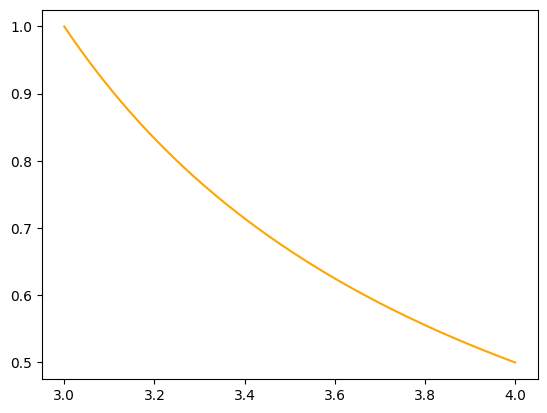

In [57]:
#------------------------------------------------------3.-----------------------------------------------------------------------------

x = sp.symbols("x")
F3 = 1/(x - 2)
result_f3 = sp.integrate(F3, x)
result_f3

result_F3 = sp.integrate(F3, (x, 3, 4))
print(result_F3)

x = np.linspace(3, 4, 500)
y = 1/(x - 2)

plt.plot(x, y, color = "orange")
plt.title("")
plt.show

---

# 3. Numeric differentiation

In traditional calculus teaching, the emphasis is on working with formulas for functions and their derivatives. However, there are many situations (particularly in data science and machine learning) where we have a way of computing a function $f(x)$ for various values of $x$, but we definitely don't have a formula to write down.

Numerical differentiation means estimating the value of the derivative $f^\prime(x)$ for any particular value of $x$.  The idea is simple: if the derivative is the limit as $h \to 0$ of $\frac{f(x+h)  - f(x)}{h}$, then calculating this fraction for some small value of $h$ should give us a good estimate of the value of the derivative.  For example, we might choose $h=0.001$ and then calculate $\frac{f(x+0.001)  - f(x)}{0.001}$.


### Exercise 3.1

The code below defines a Python function $f(x)$.  Write some code to estimate the value of the derivative $f^\prime$ at points between 0 and 10.  

To combine this witha  bit of a Python challenge, try to automate the process for 100 points and the draw a plot.  Some hints are given below.

In [ ]:
# Define f(x)
def f(x):
    return x*np.sin(np.exp(x/3))

# Now draw the graph of f(x)
p = figure(width=600, height=600, title='f(x)')
p.line(np.linspace(0,10,400), f(np.array(np.linspace(0,10,400))), line_width=2)
show(p)



In [ ]:
# Write some code here to estimate the derivative of f(x) at various points.


In [ ]:
# Here are some hints for the challenge version.

# Step 1:  Make a list of x-values from 0 to 10 with 
# The line below gives a list (actually, a NumPy vector) with 100 entries spaced evenly between 0 and 10.
xvals = np.linspace(0,10,100)

# Step 2:  Make a new list yvals = ... where yvals[i] is your estimate of the derivative of f at xvals[i].
# Write you code here


# Step 3: Add it to the plot.
p.line(xvals, yvals, line_width=2)
show(p)


---
# 4. Partial derivatives

If you are happy with ordinary derivatives, then partial derivatives should be a fairly easy step.

Given a function $f(x,y)$, the partial derivative $\frac{\partial f}{\partial x}$ means to think of this as a function $g_1(x)$ (pretend $y$ is just a constant) and then find the ordinary derivative $g_1^\prime$.  Similarly, $\frac{\partial f}{\partial y}$  means that we think of $f(x,y)$ as a function $g_2(y)$ by pretending $x$ is a constant, and then compute $g_2^\prime(y)$.

Somewhat more concretely, $\frac{\partial f}{\partial x}$ is the limit as $h$ gets smaller and smaller of the ratio
$$
\frac{f(x+h,y) - f(x,y)}{h}
$$
and 
$\frac{\partial f}{\partial y}$ is the limit as $h$ gets smaller and smaller of
$$
\frac{f(x,y+h) - f(x,y)}{h}
$$

The partial derivatives measure how quickly the value of the function changes as we move in each of the coordinate directions.

### Exercise 4.1
If you want to practice symbolic partial derivatives on paper, try computing formulas for the following:
1. $y^2 e^x$
2. $\sin(x^2 y^3)$
3. $\log (1 + \sqrt{x+y})$
4. $\cos (x+ 2y)^3$

You can check your answers using SymPy.


In [ ]:
x = sym.Symbol("x")
y = sym.Symbol("y")
exp1 = ...
exp2 = ...
exp3 = ...
exp4 = ...

# Differentiate the expression with respect to x
output = sym.diff(exp1,x)

### Exercise 4.2
A Python function $g(x,y)$ has been defined.  Numerically calculate the partial derivatives at the point (3,3).

---
# 5. Gradients and directional derivatives

## Review

Given a function $f(x,y,z)$, the gradient $\nabla f$ is a function that outputs a vector for each input point $(x,y,z)$, so we call it a 'vector-valued' function. If we input a particular point, the output will be the vector of partial derivatives at this point. So
$$
\nabla f (x,y,z) = (\frac{\partial f}{\partial x}(x,y,z), \frac{\partial f}{\partial y}(x,y,z), \frac{\partial f}{\partial z}(x,y,z) ).
$$
The gradient is a vector of dimension equal to the number of variables.  So e.g., the gradient of a function $f(x,y,z,w)$ will live in $\mathbb{R}^4$.

### Example
If $f(x,y) = x^2 + 3xy + y^4$, then
$$
\frac{\partial f}{\partial x} = 2x + 3y, \text{ and } \frac{\partial f}{\partial y} = 3x + 4y^3.
$$
So $\nabla f$ is the vector-valued function $(2x + 3y, 3x + 4y^3)$.  If we plug in a particular point $(x,y)=(1,2)$ then $\nabla f(1,2) = (8, 35)$.

### Directional derivatives

Given vector $\vec{u}$, the **directional derivative** of a function $f(\vec{x})$ at a point $\vec{x}$, written $\nabla_{\vec{u}} f (\vec{x})$, is the limit as a number $h \to 0$ of
$$
\frac{f(\vec{x} + h\vec{u}) - f(\vec{x})}{h}.
$$
(Notice how much this looks like the definition of ordinary derivative for a single variable function $f(x)$).

Super useful fact:  $\nabla_{\vec{u}} f = \vec{u} \cdot \nabla f$.


### Exercise 5.1 
This one is to be done on paper.
1. Check that if $\vec{u} = (1,0)$ or $(0,1)$, then the directional derivative is equal to the partial derivatives $\frac{\partial f}{\partial x}$ or $\frac{\partial f}{\partial y}$ respectively.  Try to do this without the above fact, and then using it.
2. If $f(x,y) = x^2 + 3xy + y^4$, calculate the directional derivatives $\nabla_{(5,2)}f$ and $\nabla_{(10,4)}f$ at the point $(3,1)$.  
3. Without using the above dot product fact, can you see why $\nabla_{\lambda \vec{u}} f = \lambda \nabla_{\vec{u}} f$ in general for any $f$ and any vector $\vec{u}$?  


### Exercise 5.2
Consider the function $g(x,y)$ whose contour plot is shown below.
1. At origin $(0,0)$, give a very rough estimate of the gradient $\nabla g$ by looking at the contour plot below.
2. Next, numerically estimate the gradient at the origin.  Does your calculation agree with your estimate?
4. By looking at the contour plot, can you estimate whether the directional derivative at the origin along the vector $\vec{u}=(-1,4)$ is positive, negative, or close to zero?
3. Numerically estimate the value of the directional derivative along the vector $\vec{u}=(-1,4)$ using the definition of directional derivative (instead of the dot product with the gradient).
4. Now take the dot product of your estimate of the gradient with $\vec{u}$.  Do get the same result?
5. From looking at the contour plot, can you find some points where the gradient is (very nearly) zero because the function has a local minimum?
6. [A bit more challenging] Can you find a point where the gradient is (very nearly) zero because the function has a local maximum?
7. [Even more challenging] Can you find a point where the gradient is (very nearly) zere because the function has a saddle point (neither local max nor local min)?  In the plotting code below, it might be helpful to change the color ranges by replacing

levels = np.linspace(-10, 14, 12)

with

levels = np.linspace(-1, 1, 12)



In [ ]:
# Code to define g(x,y) and draw its contour plot

xi = np.linspace(-10, 10, 100)
yi = np.linspace(-10, 10, 100)
X,Y = np.meshgrid(xi,yi)
Z = g(X,Y)

functionplot = figure(width=700, height=500, x_range=(-10, 10), y_range=(-10, 10))
levels = np.linspace(-10, 14, 12)

contour_renderer = functionplot.contour(X, Y, Z, levels, fill_color=Viridis, line_color="black")
colorbar = contour_renderer.construct_color_bar()
functionplot.add_layout(colorbar, "right")

show(functionplot)

In [ ]:
# Write your code here for numerical estimates of derivatives and the gradient



---
# 6. Vectors, dot products, and angles


Generalising Pythagoras's theorem for the length of the hypotenuse of a right triangle, the length of a vector $\vec{u}=(u_1, \ldots, u_n)$ is 
$$
|\vec{u}| = \sqrt{u_1^2 + u_2^2 + \cdots + u_n^2}.
$$

The dot product of two vectors $\vec{u}=(u_1, \ldots, u_n)$ and $\vec{v}= (v_1, \ldots, v_n)$ is defined to be the number
$\vec{u}\cdot \vec{v} = u_1 v_1 + u_2 v_2 + \cdots + u_n v_n$.   Notice that

$$\vec{u}\cdot \vec{u} = |\vec{u}|^2.$$

The utility of the dot product is that it gives us a way to compute angles between vectors.    Two vectors $\vec{u}$ and $\vec{v}$ in $\mathbb{R}^n$ will always sit in a unique plane (you might have heard that 2 points determine a line and 3 points determine a plane - the 3 points we're using here are the endpoints of the two vectors and the origin).  In that plane, we can measure the angle $\theta$ between the vectors. A fundamental fact is:

$$
\vec{u} \cdot \vec{v} = |\vec{u}| |\vec{v}| \cos (\theta).
$$

Solving this equation for $\theta$ gives
$$
\theta = \mathrm{acos} \left( \frac{\vec{u}\cdot \vec{v}}{|\vec{u}| |\vec{v}|} \right)
$$
Everything on the right can be calculated using the dot product.

**An important special case:** the dot product gives zero exactly when the two vectors meet at a right angle.

In Python, we define vectors using NumPy as

**u = np.array([1,3,7])**

**v= np.array([5,2,1])**

and then we can get the dot product using

**u @ v**




### Exercise 6.1
Use the dot product to compute each of the following.
1. The length of the vector $\vec{u}=(5,-3)$
2. The length of the vector $\vec{v}=(1,1)$.
3. The angle (in degrees) between $\vec{u}$ and $\vec{v}$.
4. The length of the vectors $\vec{a} = (1,2,3,4,5,6,7)$ and $\vec{b} = (1,3,5,7,9,11,13)$.
5. The angle between $\vec{a}$ and $\vec{b}$.

In [ ]:
# code here for 6.1


### Exercise 6.2

(If the 'fancy' Plotly 3d plots are working for you then you can try this.)
Consider the vectors $\vec{u}=(3,3,3)$ and $\vec{v}=(1,0,2)$.  
1. By looking at the 3d plot, try to visually estimate the angle between these two vectors.
2. Then calculate it with the dot product.  Was your estimate good?


In [ ]:
# Code for 6.2

u = ...
v = ...
FancyPlot3dVectors([u,v])


---
# 7. Projections

The projection of a vector $\vec{u}$ onto a vector $\vec{v}$ is a vector on the line spanned by $\vec{v}$ that is as close to $\vec{u}$ as possible.  The formula is

$$ \mathrm{Proj}_{\vec{v}}(\vec{u}) = \left( \frac{\vec{u}\cdot \vec{v}}{\vec{v} \cdot \vec{v}} \right) \vec{v} .$$

Note that the thing in the parentheses is a scalar, so this is a scalar time $\vec{v}$, and hence it is a point on the line spanned by $\vec{v}$.

The **residual** vector is what's left over:  $$\vec{u} = \mathrm{Proj}_{\vec{v}}(\vec{u}) + \mathrm{residual}.$$  In the lectures, I wrote this as
$\vec{u} = \vec{u}_1 + \vec{u}_2$.

**Important fact:** the residual vector is alway perpendicular to the vector $\vec{v}$ that we are projecting onto.


### Exercise 7.1

1. On a piece of paper, draw a sketch of the vectors $\vec{u}=(6,-3)$ and $\vec{v}=(1,1)$.  Without calculating anything, try to sketch the projection of $\vec{u}$ onto $\vec{v}$. Then look at your sketch and estimate the coordinates of the projection.

2. Working in $\mathbb{R}^3$ now, what is the projection of the vector $(5,6,4)$ onto the vector $(1,0,0)$?  Can you see the trick that lets you find the answer without having to do any calculation?



In [ ]:
# To check calculations of projections, you can use this code.  This should be about the same as code you wrote last week.
def Proj(vect1, vect2):
    return ((np.array(vect1) @ np.array(vect2)) / (np.array(vect2) @ np.array(vect2)))*np.array(vect2)


# And here is some code for plots of projections in 2d.

def Plot2dProjection(vect1, vect2):   
    p = figure(width=800, height=600, title="Vectors!", aspect_ratio=1)
    vect3 = Proj(vect1, vect2)
    for vect in [vect1, vect2, vect3]:
        xcoords = [0,vect[0]]
        ycoords = [0,vect[1]]
        p.line(xcoords, ycoords, line_width=2, color='blue')
        p.circle([vect[0]], [vect[1]], color='red', size=6)
    p.line([vect3[0], vect1[0]], [vect3[1], vect1[1]], line_width=2, color='grey')
    show(p)

In [ ]:
# you can write some code here
